Sentiment Analysis Natural language processing has extensively applied in sentiment analysis as a significant challenge. In this scenario, the objective is to determine if the tweets shared by customers regarding technology companies that produce and sell mobiles, computers, laptops, and similar products express positive sentiment or negative sentiment. The goal will be to build a system that can accurately classify the new tweets sentiments. You can divide the data into train and test. The Evaluation metric you should use is the accuracy.

In [ ]:
#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

load and read the data

In [ ]:
# Define column names and encoding
DATASET_COLUMNS = ['id', 'label', 'text']
DATASET_ENCODING = "ISO-8859-1"

# Load the CSV
df = pd.read_csv("/content/tweets.csv", encoding=DATASET_ENCODING, names=DATASET_COLUMNS, header=None)
df


,id,label,text
0,id,label,tweet
1,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
2,2,0,Finally a transparant silicon case ^^ Thanks t...
3,3,0,We love this! Would you go? #talk #makememorie...
4,4,0,I'm wired I know I'm George I was made that wa...
...,...,...,...
7916,7916,0,Live out loud #lol #liveoutloud #selfie #smile...
7917,7917,0,We would like to wish you an amazing day! Make...
7918,7918,0,Helping my lovely 90 year old neighbor with he...
7919,7919,0,Finally got my #smart #pocket #wifi stay conne...


In [ ]:
#droping the first row
df = df[df['label'] != 'label']
df.reset_index(drop=True, inplace=True)

In [ ]:
df.label.value_counts()

,count
label,
0,5894
1,2026


In [ ]:
#checking for the null values
df.isnull().sum()

,0
id,0
label,0
text,0


clean words

In [ ]:
words_remove = ["ax","i","you","edu","s","t","m","subject","can","lines","re","what", "there","all","we",
                "one","the","a","an","of","or","in","for","by","on","but","is","in","a","not","with","as",
                "was","if","they","are","this","and","it","have","has","from","at","my","be","by","not","that",
                "to","from","com","org","so","said","from","what","told","over","more","other",
                "have","last","with","this","that","such","when","been","says","will","also","where","why",
                "would","today", "in", "on", "you", "r", "d", "u", "hw","wat", "oly", "s", "b", "ht",
                "rt", "p","the","th", "n", "was"]
def cleantext(df, words_to_remove = words_remove):

    df['cleaned_text'] = df['text'].replace(r'\'|\"|\,|\.|\?|\+|\-|\/|\=|\(|\)|\n|"', '', regex=True)
    df['cleaned_text'] = df['cleaned_text'].replace("  ", " ")

    # remove emoticons form the tweets
    df['cleaned_text'] = df['cleaned_text'].replace(r'<ed>','', regex = True)
    df['cleaned_text'] = df['cleaned_text'].replace(r'\B<U+.*>|<U+.*>\B|<U+.*>','', regex = True)

    # convert tweets to lowercase
    df['cleaned_text'] = df['cleaned_text'].str.lower()

    #remove user mentions
    df['cleaned_text'] = df['cleaned_text'].replace(r'^(@\w+)',"", regex=True)

    #remove_symbols
    df['cleaned_text'] = df['cleaned_text'].replace(r'[^a-zA-Z0-9]', " ", regex=True)

    #remove punctuations
    df['cleaned_text'] = df['cleaned_text'].replace(r'[[]!"#$%\'()\*+,-./:;<=>?^_`{|}]+',"", regex = True)

    #remove_URL(x):
    df['cleaned_text'] = df['cleaned_text'].replace(r'https.*$', "", regex = True)

    #remove 'amp' in the text
    df['cleaned_text'] = df['cleaned_text'].replace(r'amp',"", regex = True)

    #remove words of length 1 or 2
    df['cleaned_text'] = df['cleaned_text'].replace(r'\b[a-zA-Z]{1,2}\b','', regex=True)
     #remove extra spaces in the tweet
    df['cleaned_text'] = df['cleaned_text'].replace(r'^\s+|\s+$'," ", regex=True)


    #remove stopwords and words_to_remove
    stop_words = set(stopwords.words('english'))
    mystopwords = [stop_words, "via", words_to_remove]

    df['fully_cleaned_text'] = df['cleaned_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in mystopwords]))
    return df
#get the processed tweets
df = cleantext(df,words_remove)

Split Data into Train/Test Sets



In [ ]:
from sklearn.model_selection import train_test_split

X = df['cleaned_text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


 Feature Extraction (Text Vectorization)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


 Understanding the common words

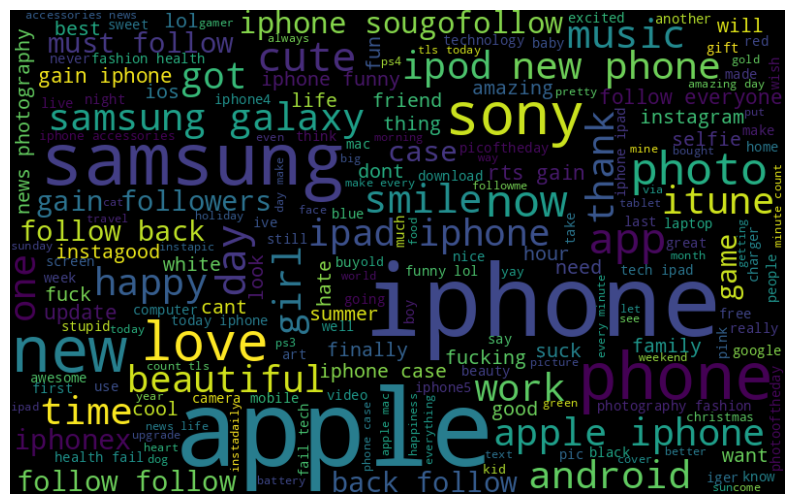

In [ ]:
all_words = ' '.join([text for text in X_train])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Model Training (Logistic Regression)



In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_vec, y_train)

LogisticRegression()

Evaluation (Accuracy)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test_vec)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))

prediction

In [ ]:
#Predict New Tweet Sentiments
def predict_sentiment(new_tweets):
    cleaned = [clean_text(tweet) for tweet in new_tweets]
    vect = vectorizer.transform(cleaned)
    preds = model.predict(vect)
    return ["Positive" if p == 1 else "Negative" for p in preds]